<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium





Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [624 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,472 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu j

In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.imdb.com/title/tt15474916/reviews/?ref_=tt_ql_2"
reviews = []

while len(reviews) < 1000:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    review_divs = soup.find_all('div', class_='lister-item-content')

    for review_div in review_divs:
        review = review_div.find('div', class_='text').get_text().strip()
        reviews.append(review)

        if len(reviews) == 1000:
            break

    next_button = soup.find('div', class_='load-more-data')
    if not next_button:
        break

    next_data_key = next_button['data-key']
    url = f'https://www.imdb.com/title/tt15474916/reviews/_ajax?paginationKey={next_data_key}'

df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('Movie_Reviews.csv', index=False)
print(df.head(10))

                                              Review
0  Firstly, Rose is a better person than me becau...
1  It's hard to shake the uneasy feeling of this ...
2  I think this film's getting a little more cred...
3  Sosie Bacon plays an incompetent therapist who...
4  I can't stop smiling at the mastery of filmmak...
5  You never know when it's your turn, to watch a...
6  Smile (2022) is a movie my wife and I caught a...
7  First off, salute to the director and writer. ...
8  This little gem goes to show you that even the...
9  Smile is a new horror film directed and writte...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('large_grammars')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package large_grammars to /root/nltk_data...
[nltk_data]   Unzipping grammars/large_grammars.zip.


True

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Load CSV file
df = pd.read_csv('Movie_Reviews.csv')

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_text(text):
    # Remove special characters and punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Remove numbers
    text = re.sub('[0-9]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = text.split()

    # Remove stopwords and stem/lemmatize words
    clean_words = []
    for word in words:
        if word not in stop_words:
            # Stemming
            #clean_words.append(stemmer.stem(word))
            # Lemmatization
            clean_words.append(lemmatizer.lemmatize(word))

    # Join words back into text
    clean_text = ' '.join(clean_words)

    return clean_text

# Apply cleaning function to 'text' column and save to new column 'clean_text'
df['clean_text'] = df['Review'].apply(clean_text)

# Save cleaned data to CSV file
df.to_csv('Cleaned_Movie_Reviews.csv', index=False)


print(df.head(10))

                                              Review  \
0  Firstly, Rose is a better person than me becau...   
1  It's hard to shake the uneasy feeling of this ...   
2  I think this film's getting a little more cred...   
3  Sosie Bacon plays an incompetent therapist who...   
4  I can't stop smiling at the mastery of filmmak...   
5  You never know when it's your turn, to watch a...   
6  Smile (2022) is a movie my wife and I caught a...   
7  First off, salute to the director and writer. ...   
8  This little gem goes to show you that even the...   
9  Smile is a new horror film directed and writte...   

                                          clean_text  
0  firstly rose better person done man told spent...  
1  hard shake uneasy feeling film grim foggy core...  
2  think film getting little credit deserves sens...  
3  sosie bacon play incompetent therapist mutter ...  
4  stop smiling mastery filmmaking display smile ...  
5  never know turn watch another squirm shuffle c... 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['clean_text']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [ ]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('dr', 'rose', 'cotter'): 31, ('director', 'parker', 'finn'): 30, ('good', 'horror', 'movie'): 24, ('best', 'horror', 'movie'): 22, ('rose', 'cotter', 'sosie'): 21, ('cotter', 'sosie', 'bacon'): 21, ('cheap', 'jump', 'scare'): 21, ('many', 'jump', 'scare'): 20, ('lot', 'jump', 'scare'): 19, ('good', 'jump', 'scare'): 17, ...})

In [ ]:
#1.2 - Probability of Bi grams
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('also', 'reason'):0.0027472527472527475
('reason', 'high'):0.013333333333333334
('rating', 'great'):0.016129032258064516
('great', 'supernatural'):0.00273224043715847
('supernatural', 'death'):0.017241379310344827
('chain', 'movie'):0.027777777777777776
('gave', 'ring'):0.015873015873015872
('vibe', 'little'):0.041666666666666664
('little', 'contemporary'):0.005263157894736842
('contemporary', 'love'):1.0
('love', 'device'):0.00909090909090909
('device', 'using'):0.08333333333333333
('using', 'smile'):0.038461538461538464
('uncomfortable', 'something'):0.05263157894736842
('something', 'normally'):0.00390625
('normally', 'happy'):0.058823529411764705
('happy', 'absolutely'):0.023255813953488372
('terrifying', 'making'):0.015384615384615385
('audience', 'completely'):0.011627906976744186
('completely', 'edge'):0.015625
('time', 'constantly'):0.0019267822736030828
('constantly', 'hallucinating'):0.05555555555555555
('hallucinating', 'gr

In [ ]:
#1.3 Noun Phrases and relative probabilities of each review in terms of other reviews
whole_dataset = ''
index = []
i = 1
for line in df['clean_text']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from textblob import TextBlob
import pandas as pd

noun_phrases = []
frequency = []
whole_dataset = ' '.join(df['clean_text']) # concatenate all the text into a single string
for line in df['clean_text']:
    blob = TextBlob(line)
    for nouns in blob.noun_phrases:
        noun_phrases.append(nouns)
for word in noun_phrases:
    noun_phrases_freq = []
    word_count = whole_dataset.count(word)
    for line in df['clean_text']:
        if word_count == 0:
            noun_phrases_freq.append(0.0)
        else:
            noun_phrases_freq.append(line.count(word) / word_count)
    frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = df.index
noun_phrases_df

,rest day prison peace,lot horror,ring lot orthodox method horror movie,effective problem figure,gon na end,pretty dozy,scare woke,repetitive bode,unimaginative movie,old trick,...,predictable smile,character movie,everyday situation sport crowd impact movie,suffers problem lot,scare film suffer premise,couple spot cinematography gem,great mix colour soundtrack boot essence,imaginative idea fall,similar vein purge good idea,imagination part writer end
0,1.0,0.045455,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import math
import pandas as pd

def tf_idf_value(sentence, word):
    size = len(sentence.split(" "))
    tf_value = sentence.count(word) / size
    idf_value = 0
    if tf_value != 0:
        idf_value = math.log(size) / sentence.count(word)
    else:
        return 0
    return tf_value * idf_value

sentences = df["clean_text"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list, columns=["token"])
count = 0
for i in sentences:
    tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
    count += 1

tf_idf




<ipython-input-15-5c468f7c6776>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-15-5c468f7c6776>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-15-5c468f7c6776>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,token,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,cameraf,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,straddle,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,anticipated,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,astray,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,gonna,0.035705,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,zeal,0.000000,0.0,0.0,0.0,0.0,0.069111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7920,dora,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7921,education,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7922,clean,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
query_sentence = 'The amazing cinematography in Smile makes me smile nonstop. Excellent directing is done. Everything is flawless in terms of technology, particularly the sound design. The mood is further improved by the musical score. Transitional pictures, in their most basic form, are breathtaking.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2

In [ ]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [ ]:
similarity_list = []
for sentence in df['clean_text']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,"Firstly, Rose is a better person than me becau...",0.035714
1,It's hard to shake the uneasy feeling of this ...,0.017937
2,I think this film's getting a little more cred...,0.000000
3,Sosie Bacon plays an incompetent therapist who...,0.063387
4,I can't stop smiling at the mastery of filmmak...,0.116473
...,...,...
995,I'm a teenage girl so take that to heart or ju...,0.000000
996,I Would Like To Say That I love to watch Horro...,0.028490
997,"Bland, boring and overwhelmingly predictable, ...",0.024398
998,"It's lame, what can I say?More of a whole eye-...",0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
from gensim.models import Word2Vec

sentences = df["clean_text"].values.tolist()
# Split each sentence into a list of individual tokens
sentences = [sentence.split() for sentence in sentences]

# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)


Word2Vec<vocab=7924, vector_size=100, alpha=0.025>
['movie', 'horror', 'film', 'good', 'smile', 'like', 'one', 'scare', 'really', 'jump', 'well', 'time', 'character', 'would', 'ending', 'see', 'story', 'make', 'scary', 'watch', 'thing', 'scene', 'end', 'get', 'much', 'great', 'way', 'also', 'rose', 'even', 'people', 'could', 'acting', 'follows', 'plot', 'think', 'seen', 'feel', 'first', 'better', 'bacon', 'many', 'made', 'know', 'something', 'going', 'go', 'trauma', 'lot', 'say', 'creepy', 'watching', 'main', 'bit', 'sosie', 'actually', 'part', 'done', 'moment', 'bad', 'pretty', 'little', 'start', 'sound', 'never', 'give', 'predictable', 'point', 'ring', 'best', 'nothing', 'still', 'thought', 'entity', 'definitely', 'person', 'come', 'idea', 'suicide', 'mental', 'work', 'curse', 'enough', 'minute', 'overall', 'felt', 'want', 'though', 'performance', 'lead', 'year', 'another', 'long', 'quite', 'take', 'whole', 'someone', 'effect', 'trailer', 'director', 'every', 'right', 'patient', 'ori

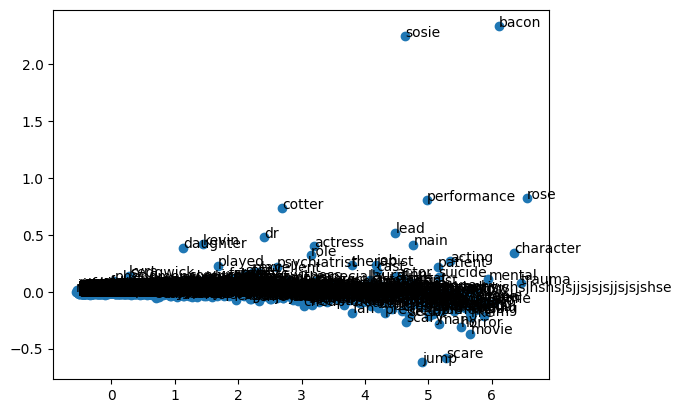

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = df["clean_text"].values.tolist()
# Split each sentence into a list of individual tokens
sentences = [sentence.split() for sentence in sentences]

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index.keys())
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:



